# NetworkX sandbox

### Simple use

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [29]:
G = nx.Graph()

In [30]:
edges = [(1, 3),(2, 6),(6, 1),(2, 3),(1,8)]
G.add_edges_from(edges)

In [31]:
G.edges

EdgeView([(1, 3), (1, 6), (1, 8), (3, 2), (2, 6)])

In [32]:
G.adj

AdjacencyView({1: {3: {}, 6: {}, 8: {}}, 3: {1: {}, 2: {}}, 2: {6: {}, 3: {}}, 6: {2: {}, 1: {}}, 8: {1: {}}})

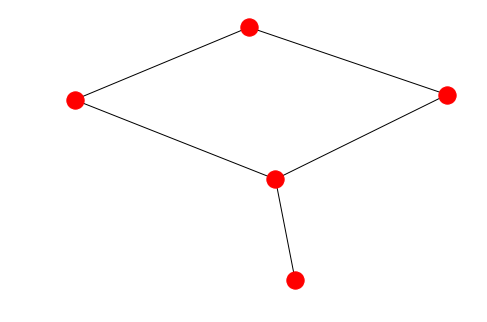

In [33]:
nx.draw(G)

In [34]:
G.nodes

NodeView((1, 3, 2, 6, 8))

Nodes, edges, neighbors/adjacencies, and degrees are the major views of the graph. They can be converted to containers of choice, here lists.

In [35]:
list(G.nodes)

[1, 3, 2, 6, 8]

In [36]:
list(G.edges)

[(1, 3), (1, 6), (1, 8), (3, 2), (2, 6)]

In [37]:
list(G.adj[1])  # or list(G.neighbors(1))

[3, 6, 8]

In [38]:
G.degree[1]  # the number of edges incident to 1

3

### 2D edges
Now let's try with 2D nodes of floating-point values.

In [39]:
H = nx.Graph()

In [40]:
# Try to generate a 3D array (10, 2, 2) with random values. These are 10 2D edges.
edges_2d = np.random.randn(10, 2, 2)

In [41]:
edges_2d

array([[[ 0.58863195,  0.01740024],
        [-0.1611733 ,  1.03201699]],

       [[ 0.03422947, -0.84647721],
        [-0.5455303 , -1.22682664]],

       [[-1.57574683,  0.57567455],
        [ 0.12638122, -0.16497539]],

       [[-1.50647521,  0.3414014 ],
        [-1.26041147,  1.03061325]],

       [[ 1.35021478, -2.75606224],
        [ 0.30626375, -0.37311409]],

       [[ 0.02214424,  0.14459669],
        [ 0.1111175 ,  1.23563853]],

       [[ 1.0099414 , -0.56621464],
        [-0.71864888, -0.22546283]],

       [[-0.13626173,  0.32312943],
        [ 0.71073493,  0.18796126]],

       [[-2.15764367,  0.87625088],
        [ 0.26179897, -0.78476995]],

       [[-0.76064079,  0.76723091],
        [ 1.12022227, -0.24734192]]])

In [42]:
H.add_edges_from(edges_2d)  # edges_2d is ambiguous

TypeError: unhashable type: 'numpy.ndarray'

In [43]:
# So, we'll just hard-code them. Don't need that many.
edges_2d = [((860.76110000000006, 860.76850000000002),
  (880.76110000000006, 900.76850000000002)),
 ((905.17286470588238, 797.82732352941184),
  (875.76110000000006, 775.76850000000002)),
 ((905.17286470588238, 797.82732352941184),
  (900.76110000000006, 800.76850000000002)),
 ((875.76110000000006, 775.76850000000002),
  (845.09188154025071, 745.09928154025067))]

In [44]:
H.add_edges_from(edges_2d)

In [45]:
H.edges

EdgeView([((860.7611, 860.7685), (880.7611, 900.7685)), ((905.1728647058824, 797.8273235294118), (875.7611, 775.7685)), ((905.1728647058824, 797.8273235294118), (900.7611, 800.7685)), ((875.7611, 775.7685), (845.0918815402507, 745.0992815402507))])

In [46]:
# Now nodes will be 2D points
H.nodes

NodeView(((860.7611, 860.7685), (880.7611, 900.7685), (905.1728647058824, 797.8273235294118), (875.7611, 775.7685), (900.7611, 800.7685), (845.0918815402507, 745.0992815402507)))

In [49]:
# Finding the adjacent nodes of a node (this is for the move actions available from a node)
node1 = (860.7611, 860.7685)
list(H.adj[node1])

[(880.7611, 900.7685)]

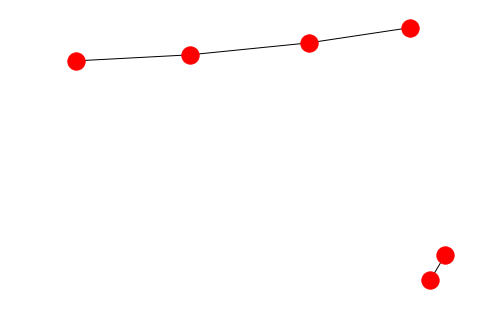

In [50]:
nx.draw(H)

### Weighted edges
Let's add weights and see how to manipulate them. Using the L2 norm.

In [51]:
np.linalg.norm(np.array((23.13, 10.15)) - np.array((5.67, 31.18)))

27.33335873982559

In [52]:
GR = nx.Graph()

In [53]:
for e in edges_2d:
    wt = np.linalg.norm(np.array(e[1]) - np.array(e[0]))
    GR.add_edge(*e, weight=wt)

In [54]:
GR.edges

EdgeView([((860.7611, 860.7685), (880.7611, 900.7685)), ((905.1728647058824, 797.8273235294118), (875.7611, 775.7685)), ((905.1728647058824, 797.8273235294118), (900.7611, 800.7685)), ((875.7611, 775.7685), (845.0918815402507, 745.0992815402507))])

In [56]:
for (u, v, wt) in GR.edges.data('weight'):
    print(f"({u}, {v}, {wt:.3})")

((860.7611, 860.7685), (880.7611, 900.7685), 44.7)
((905.1728647058824, 797.8273235294118), (875.7611, 775.7685), 36.8)
((905.1728647058824, 797.8273235294118), (900.7611, 800.7685), 5.3)
((875.7611, 775.7685), (845.0918815402507, 745.0992815402507), 43.4)


In [60]:
# How to get the edge weights for all the neighbors?
edge1 = ((860.7611, 860.7685), (880.7611, 900.7685))
GR.edges[edge1]["weight"]

44.721359549995796

In [62]:
node2 = (905.1728647058824, 797.8273235294118)
GR.has_edge(*edge1)

True

In [63]:
GR.adj[node2]

AtlasView({(875.7611, 775.7685): {'weight': 36.76470588235295}, (900.7611, 800.7685): {'weight': 5.3022812874469825}})

In [64]:
for nd, wt_dict in GR.adj[node2].items():
    print("Next node is", nd, "with edge weight", wt_dict["weight"])

Next node is (875.7611, 775.7685) with edge weight 36.76470588235295
Next node is (900.7611, 800.7685) with edge weight 5.3022812874469825


### Point-of-interest off the graph
1. How to find the closest graph element (node or edge) to a point off the graph?
2. How to connect the off-graph point as a new node in the graph? There are two different cases: connect to a node with a new edge; split an edge into two and connect to the splitting node with a new edge.  

The edges are 
```
((860.7611, 860.7685), (880.7611, 900.7685), 44.7)
((905.1728647058824, 797.8273235294118), (875.7611, 775.7685), 36.8)
((905.1728647058824, 797.8273235294118), (900.7611, 800.7685), 5.3)
((875.7611, 775.7685), (845.0918815402507, 745.0992815402507), 43.4)
```
and the graph looks like  
<img src="nx-graph-sandbox-graph-h.png" width="400"/>  

Note that this is not graphed to scale in a Cartesian coordinate system. It simply shows connectivity. The graphing is non-deterministic.

In [69]:
# Add a point of interest as a new node
GR.nodes

NodeView(((860.7611, 860.7685), (880.7611, 900.7685), (905.1728647058824, 797.8273235294118), (875.7611, 775.7685), (900.7611, 800.7685), (845.0918815402507, 745.0992815402507)))

In [70]:
np.array(GR.nodes)

array([[860.7611    , 860.7685    ],
       [880.7611    , 900.7685    ],
       [905.17286471, 797.82732353],
       [875.7611    , 775.7685    ],
       [900.7611    , 800.7685    ],
       [845.09188154, 745.09928154]])

In [75]:
new_node = np.average(np.array(GR.nodes), axis=0)
print(new_node)

[878.05152437 813.50010084]


In [77]:
GR.add_node(tuple(new_node))

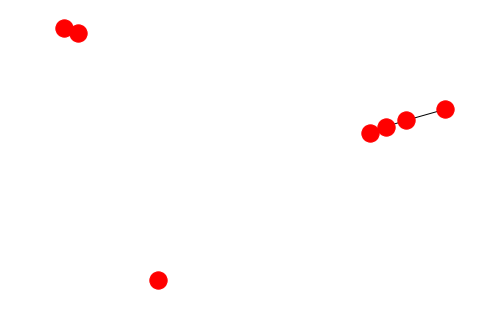

In [78]:
nx.draw(GR)

This [SO answer](https://stackoverflow.com/a/47198877/6562147) contains a quick computation of the point on a line closest to a point off the line. _TODO: Need to understand the second equation!_ The computation is encapsulated in a function:
```python
def p4(p1, p2, p3):
    x1, y1 = p1  # line defined by p1 and p2
    x2, y2 = p2
    x3, y3 = p3  # point off the line
    
    dx, dy = x2 - x1, y2 - y1
    det = dx * dx + dy * dy
    a = (dy * (y3 - y1) + dx * (x3 - x1)) / det
    
    return x1 + a * dx, y1 + a * dy
```

Each edge defines a line in space (p1, p2). The off-the-edge point of interest is p3. The point on the line of the edge (p1, p2) closest to the point p3.

However, here's a sketch of the extreme problem with this approach:
<img src="closest-graph-edge-problem-worst.jpg" width="600"/>

So, the solution has to forgo edges and rely on the density of nodes. This is by all means the easier solution.

### Shortcuts to neighbors and edges

In [79]:
# The following is a nice shortcut to G.adj[node2]
GR[node2]

AtlasView({(875.7611, 775.7685): {'weight': 36.76470588235295}, (900.7611, 800.7685): {'weight': 5.3022812874469825}})

In [84]:
# The following is a nice shortcut to edges
for neib in GR[node2]:
    print(GR.edges[node2, neib])  # order doesn't matter (what a cool package altogether)
    print(GR.edges[node2, neib]["weight"])

{'weight': 36.76470588235295}
36.76470588235295
{'weight': 5.3022812874469825}
5.3022812874469825
